In [405]:
import numpy as np
import matplotlib.pyplot as plt

<img src="https://static.leiphone.com/uploads/new/article/740_740/201701/5881deecab918.png?imageMogr2/format/jpg/quality/90">

In [406]:
import torch

## Torch.tensor

Торч почти numpy, только вместо array теперь tensor. Каждый torch.tensor является частью вычислительного графа. 

In [407]:
t = torch.tensor(np.ones((2,2)))

In [408]:
t

tensor([[1., 1.],
        [1., 1.]], dtype=torch.float64)

In [410]:
torch.rand((2,3))

tensor([[0.6064, 0.0268, 0.7857],
        [0.9055, 0.8597, 0.8080]])

In [411]:
torch.ones((4,4))

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [412]:
torch.zeros_like(t)

tensor([[0., 0.],
        [0., 0.]], dtype=torch.float64)

Вместо .shape в torch .size

In [417]:
t

tensor([[1., 1.],
        [1., 1.]], dtype=torch.float64)

In [413]:
t.shape


torch.Size([2, 2])

In [415]:
t.size()

torch.Size([2, 2])

Вместо .reshape в торч .view

In [418]:
t.reshape(1,4)

tensor([[1., 1., 1., 1.]], dtype=torch.float64)

Связка с numpy работает с помощью .numpy()

In [434]:
t = torch.ones((1,2))

In [435]:
t

tensor([[1., 1.]])

In [436]:
t_np = t.numpy()

In [437]:
t_np

array([[1., 1.]], dtype=float32)

In [423]:
t += 1

In [424]:
t

tensor([[2., 2.]])

In [425]:
t_np

array([[2., 2.]], dtype=float32)

In [426]:
np.copy(t_np)

array([[2., 2.]], dtype=float32)

In [438]:
t_np += 1

In [439]:
t_np

array([[2., 2.]], dtype=float32)

In [440]:
t

tensor([[2., 2.]])

Обратно torch.from_numpy

In [427]:
n = np.ones((1,2))

In [428]:
n

array([[1., 1.]])

In [429]:
n_torch = torch.from_numpy(n)

In [430]:
n_torch

tensor([[1., 1.]], dtype=torch.float64)

In [431]:
n += 1

In [432]:
n

array([[2., 2.]])

In [433]:
n_torch

tensor([[2., 2.]], dtype=torch.float64)

## torch.backwards

Мы можем регулировать хотим ли мы чтобы прокидывались градиенты через тензор с помощью torch.tensor(..., requires_grad = True/False). Это важно потому что нам не надо прокидывать градиенты по входу нейронной сети например. 

In [441]:
x = torch.tensor(1., requires_grad=True)
y = torch.tensor(3., requires_grad=True)
z = torch.tensor(5., requires_grad=True)

In [442]:
w = (x + y) * z 

In [443]:
w

tensor(20., grad_fn=<ThMulBackward>)

In [444]:
w.grad_fn

In [445]:
w.backward()

In [446]:
z.grad

tensor(4.)

In [447]:
y.grad

tensor(5.)

In [448]:
x.grad

tensor(5.)

Попробуем более сложное

In [449]:
x = torch.ones((2,2),requires_grad=True)

In [450]:
y = torch.rand((2,2),requires_grad=True)

In [451]:
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [452]:
y

tensor([[0.3471, 0.3830],
        [0.7390, 0.3297]], requires_grad=True)

In [453]:
z = x.mm(y)

In [454]:
z

tensor([[1.0861, 0.7128],
        [1.0861, 0.7128]], grad_fn=<MmBackward>)

In [455]:
z.backward(torch.ones(2,2))

In [456]:
x.grad

tensor([[0.7302, 1.0688],
        [0.7302, 1.0688]])

In [457]:
y.grad

tensor([[2., 2.],
        [2., 2.]])

Давайте найдем минимум параболы $x^2 + 3x + 2$

In [470]:
x = torch.rand((1), requires_grad=True)

In [474]:
y = x**2 + 3*x + 2

In [475]:
y.backward()

In [466]:
x.grad

tensor([4.2107])

In [ ]:
x = 

In [477]:
x = torch.rand((1), requires_grad=True)

In [478]:
alpha = 0.01

In [479]:
for i in range(1000):
    y = x**2 + 3*x + 2
    y.backward()
    
    x.data = x - alpha * x.grad
    x.grad.zero_()

In [480]:
x

tensor([-1.5000], requires_grad=True)

torch.no_grad

In [482]:
x.requires_grad = False

In [483]:
x.requires_grad

False

In [347]:
x = torch.tensor(3., requires_grad=True)

In [348]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


## torch.optimizer

In [543]:
from torch.optim import SGD, Adam 

In [552]:
x = torch.rand((1), requires_grad=True) #* torch.rand((1), requires_grad=False)
y = x**2 + 3*x + 2

In [553]:
y

tensor([2.8333], grad_fn=<AddBackward>)

In [554]:
sgd = SGD([x], lr = 0.01, momentum=0.9)

In [555]:
for i in range(1000):
    sgd.zero_grad()
    y = x**2 + 3*x + 2
    y.backward()
    sgd.step()

In [547]:
x

tensor([-1.5000], requires_grad=True)

## torch.nn

In [369]:
import torch.nn as nn
import torch.nn.functional as F

In [521]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 10)

        self.fc2 = nn.Linear(10, 2)
        

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.softmax(x)
        return x


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=2, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=2, bias=True)
)


In [522]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [523]:
x, y = make_moons(noise = 0.15)

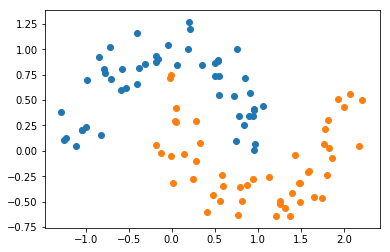

In [524]:
plt.scatter(x[y == 0, 0], x[y == 0, 1])
plt.scatter(x[y == 1, 0], x[y == 1, 1])

In [525]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y)

In [526]:
x_tr_t = torch.tensor(x_tr, dtype=torch.float32)
y_tr_t = torch.tensor(y_tr, dtype=torch.long)

In [527]:
net(x_tr_t[:5])

/home/anton/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


tensor([[0.2863, 0.7137],
        [0.3091, 0.6909],
        [0.3044, 0.6956],
        [0.2956, 0.7044],
        [0.3213, 0.6787]], grad_fn=<SoftmaxBackward>)

In [528]:
loss_func = nn.CrossEntropyLoss()

In [529]:
loss = loss_func(net(x_tr_t[:5]), y_tr_t[:5])

/home/anton/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


In [530]:
from sklearn.datasets import make_regression

In [537]:
x, y = make_regression(n_features=1, n_informative=1, noise=10)

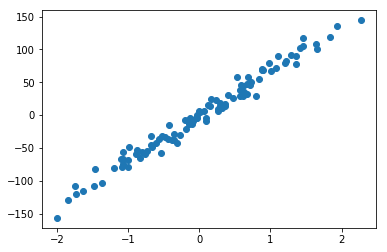

In [538]:
plt.scatter(x, y)

In [542]:
loss_func = nn.MSELoss()

In [ ]:
loss_fucn(y, y_true)